# Homework

https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/03-classification/homework.md

Notebooks: 
- https://github.com/alexeygrigorev/mlbookcamp-code/tree/master/chapter-03-churn-prediction
- https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/03-classification/notebook.ipynb

### Dataset

In this homework, we will continue the New York City Airbnb Open Data. You can take it from
[Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.

We'll keep working with the `'price'` variable, and we'll transform it to a classification task.


### Features

For the rest of the homework, you'll need to use the features from the previous homework with additional two `'neighbourhood_group'` and `'room_type'`. So the whole feature set will be set as follows:

* `'neighbourhood_group'`,
* `'room_type'`,
* `'latitude'`,
* `'longitude'`,
* `'price'`,
* `'minimum_nights'`,
* `'number_of_reviews'`,
* `'reviews_per_month'`,
* `'calculated_host_listings_count'`,
* `'availability_365'`

Select only them.


### Question 1

What is the most frequent observation (mode) for the column `'neighbourhood_group'`?


### Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value ('price') is not in your dataframe.


### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
   * In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Example of a correlation matrix for the car price dataset:

<img src="images/correlation-matrix.png" />


### Question 3

* Calculate the mutual information score for the two categorical variables that we have. Use the training set only.
* Which of these two variables has bigger score?
* Round it to 2 decimal digits using `round(score, 2)`


### Question 4

* Now let's train a logistic regression
* For that, we need to turn our price prediction problem into a binary classification task.
* Let's create a variable `above_average` which is `1` if the price is above (or equal to) `152`.
* Remember that we have two categorical variables in the data. Include them using one-hot encoding.
* Fit the model on the training dataset.
   * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
   * `model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)`
* Calculate the accuracy on the validation dataset and rount it to 2 decimal digits.


### Question 5

* We have 10 features: 8 numerical features and 2 categorical.
* Let's find the least useful one using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `neighbourhood_group`
   * `room_type` 
   * `number_of_reviews`
   * `reviews_per_month`

> **note**: the difference doesn't have to be positive


### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'price'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.


## Submit the results

Submit your results here: 

If your answer doesn't match options exactly, select the closest one.

## Deadline

The deadline for submitting is 27 September 2021, 17:00 CET. After that, the form will be closed.




# Libraries

- update scikit-learn due to [issue](https://stackoverflow.com/questions/65682019/attributeerror-str-object-has-no-attribute-decode-in-fitting-logistic-regre)

In [138]:
pip install scikit-learn  -U

     |████████████████████████████████| 22.3 MB 145 kB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.3 which is incompatible.
hypertools 0.7.0 requires scikit-learn!=0.22,<0.24,>=0.19.1, but you have scikit-learn 0.24.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [139]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
s = '../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv'
df = pd.read_csv(s)

In [141]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [142]:
Features = [
    'neighbourhood_group',
    'room_type',
    'latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365']
print(Features)

['neighbourhood_group', 'room_type', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [143]:
df = df[Features]
df.head()

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,40.64749,-73.97237,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,40.75362,-73.98377,225,1,45,0.38,2,355
2,Manhattan,Private room,40.80902,-73.94190,150,3,0,NaN,1,365
3,Brooklyn,Entire home/apt,40.68514,-73.95976,89,1,270,4.64,1,194
4,Manhattan,Entire home/apt,40.79851,-73.94399,80,10,9,0.10,1,0


# Question 1
What is the most frequent observation (mode) for the column `'neighbourhood_group'`?

In [144]:
print('most frequent observation (mode) for the column "neighbourhood_group":',
      df['neighbourhood_group'].value_counts().index[0]
     )

most frequent observation (mode) for the column "neighbourhood_group": Manhattan


# Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value ('price') is not in your dataframe.

In [145]:
from sklearn.model_selection import train_test_split
y='price'
test=0.2
val=0.2
seed=42

df_train_full, df_test = train_test_split(df, test_size=test, random_state=seed)
df_train, df_val = train_test_split(df_train_full, test_size=val/(1-test), random_state=seed)
y_test = df_test[y].copy().values
y_val = df_val[y].copy().values
y_train = df_train[y].copy().values
del df_test[y]
del df_val[y]
del df_train[y]

In [146]:
# Test
np.array([len(df_test),len(df_val),len(df_train)])/len(df)

array([0.2, 0.2, 0.6])

# Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
   * In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

In [147]:
df_corr = df.corr()
display(df_corr)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


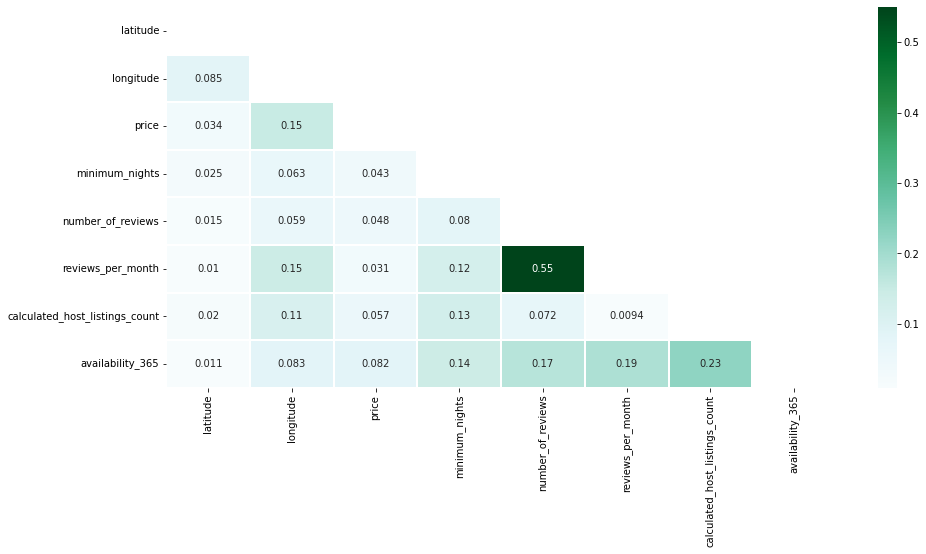

two features that have the biggest correlation:  "number_of_reviews" & "reviews_per_month"


In [148]:
plt.figure(figsize=(15,7))
mask = np.triu(np.ones_like(df_corr, dtype=bool)) # Triangle to remove doubles 
sns.heatmap(df_corr.abs(), mask=mask, cbar=True, cmap="BuGn", linewidths=0.3 ,annot=True)
plt.show()
print('two features that have the biggest correlation:', 
 ' "number_of_reviews" & "reviews_per_month"' )

# Question 3

**Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another**

* Calculate the **mutual information score** for the two categorical variables that we have. Use the training set only.
* Which of these two variables has bigger score?
* Round it to 2 decimal digits using `round(score, 2)`

In [149]:
from sklearn.metrics import mutual_info_score
for f in ['neighbourhood_group','room_type']:
    mis = mutual_info_score(y_train,df_train[f].values)
    print(f,f'\t mutual information score = {mis:.2f}')
#endfor
print('Which of these two variables has bigger score? : room_type')

neighbourhood_group 	 mutual information score = 0.11
room_type 	 mutual information score = 0.31
Which of these two variables has bigger score? : room_type


In [150]:
# more compact
(
df_train[['neighbourhood_group','room_type']]
 .apply(lambda x: round(mutual_info_score(x, y_train),2))
 .sort_values(ascending=False)
 #.map('{:,.1g}%'.format)
) #.head(1)

room_type              0.31
neighbourhood_group    0.11
dtype: float64

# Question 4
* Now let's train a logistic regression
* For that, we need to turn our price prediction problem into a binary classification task.
* Let's create a variable `above_average` which is `1` if the price is above (or equal to) `152`.
* Remember that we have two categorical variables in the data. Include them using one-hot encoding.
* Fit the model on the training dataset.
   * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
   * `model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)`
* Calculate the accuracy on the validation dataset and rount it to 2 decimal digits.

In [152]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

In [153]:
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
# print(train_dict[0])
# print(X_train[0])

In [154]:
# testing
display(
    dv.fit_transform(df_train[['neighbourhood_group','room_type']].to_dict(orient='records'))[0]
)
for f in ['neighbourhood_group','room_type']:
    display(
        dv.fit_transform(df_train[[f,'reviews_per_month']].to_dict(orient='records'))[0]
    )

array([0., 1., 0., 0., 0., 1., 0., 0.])

array([0. , 1. , 0. , 0. , 0. , 0.7])

array([0.7, 1. , 0. , 0. ])

In [155]:
def get_X(df,fill=0):
    return dv.fit_transform(df.fillna(fill).to_dict(orient='records'))   
#enddef
def make_class(y):
    return (y >= 152).astype(int)
#endef

In [156]:
# check if all elements are numbers
# (~np.isreal(get_X(df_train)[10])).sum() -> all numbers

In [167]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
#model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
# getting error "'str' object has no attribute 'decode'" for solver='lbfgs', using scikit-learn-0.24.2

In [173]:
model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model.fit(get_X(df_train), make_class(y_train))
y_pred = model.predict_proba(get_X(df_val))[:, 1]
acc_global = accuracy_score(make_class(y_val), y_pred >= 0.5)
print(f'accuracy = { acc_global :.2f}') 

accuracy = 0.79


### Question 5

* We have 10 features: 8 numerical features and 2 categorical.
* Let's find the least useful one using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `neighbourhood_group`
   * `room_type` 
   * `number_of_reviews`
   * `reviews_per_month`

> **note**: the difference doesn't have to be positive

In [179]:
res = {}
for c in list(df_train.columns):
    model.fit(get_X(df_train.drop([c],axis=1)), make_class(y_train))
    y_pred = model.predict_proba(get_X(df_val.drop([c],axis=1)))[:, 1]
    acc_col = accuracy_score(make_class(y_val), y_pred >= 0.5)
    diff= (acc_col - acc_global)
    res[c] = diff
    print(c, f'\taccuracy = { acc_col :.2f}, diff = { diff:.2g}') 
#endfor

neighbourhood_group 	accuracy = 0.75, diff = -0.041
room_type 	accuracy = 0.73, diff = -0.062
latitude 	accuracy = 0.79, diff = -0.0039
longitude 	accuracy = 0.79, diff = -0.0037
minimum_nights 	accuracy = 0.79, diff = 0.00082
number_of_reviews 	accuracy = 0.79, diff = 0.00051
reviews_per_month 	accuracy = 0.79, diff = -0.0017
calculated_host_listings_count 	accuracy = 0.79, diff = -0.001
availability_365 	accuracy = 0.78, diff = -0.0095


In [197]:
print('Question 5: feature selection - the smallest difference in accuracy:\n\t',
     pd.Series(res).abs().sort_values(ascending=True).index[0]
     )

Question 5: feature selection - the smallest difference in accuracy:
	 number_of_reviews


Question 1: Most frequent value for neighbourhood_group *
	Manhattan
    
Question 2: Features with biggest correlation *
	number_of_reviews and reviews_per_month
    
Question 3: Which variable has the highest mutual information? *
	room_type
    
Question 4: 
	0.79
    
Question 5: feature selection - the smallest difference in accuracy *
	number_of_reviews

# Question 6
* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'price'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

In [198]:
def get_rmse(y_pred, y_true):
    mse = ((y_pred - y_true) ** 2).mean()
    return np.sqrt(mse)
#enddef

In [207]:
from sklearn.linear_model import Ridge
res = {}
for alpha in [0, 0.01, 0.1, 1, 10]:
    clf = Ridge(alpha=alpha)
    clf.fit(get_X(df_train), np.log1p(y_train))
    rmse = get_rmse(clf.predict(get_X(df_val)), np.log1p(y_val))
    res[alpha] = rmse
    score = clf.score(get_X(df_val),np.log1p(y_val))
    print(f'alpha={alpha:.2f} -> rmse = {rmse:.5g}, R_sqr = {score:.5g}')     
#endfor
# best: lowest rmse, highest R_sqr => alpha=0.01,0.10,1.00

alpha=0.00 -> rmse = 0.49717, R_sqr = 0.48782
alpha=0.01 -> rmse = 0.49712, R_sqr = 0.48793
alpha=0.10 -> rmse = 0.49712, R_sqr = 0.48792
alpha=1.00 -> rmse = 0.49714, R_sqr = 0.48788
alpha=10.00 -> rmse = 0.49789, R_sqr = 0.48634


In [211]:
print("Question 6: Regression with Scikit-Learn. What's the best alpha? (has smallest rmse)\n\t",
    pd.Series(res).abs().sort_values(ascending=True).index[0]
     )

Question 6: Regression with Scikit-Learn. What's the best alpha? (has smallest rmse)
	 0.01
